Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [814]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [815]:
library(tidyverse)



Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [816]:
columns<-c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet',
           'Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
df_airbnb<-airbnb |> select(all_of(columns))
df_airbnb



City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612
Madrid,Entire home/apt,Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.7112487
Madrid,Entire home/apt,Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.7178428
Madrid,Private room,Palacio,2,2.0,1,1,30,NA,1,5,67,40.41683,-3.7102398


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [817]:
df_madrid<-df_airbnb |> filter(City == 'Madrid')|> filter(Room.Type=="Entire home/apt" & !Neighbourhood== '') |> select(-c("Room.Type",'City'))
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [818]:
df_madrid%>% mutate(Square.Meters=Square.Feet * 0.092903)->df_madrid
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,NA
2,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,NA
3,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,NA
4,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,NA
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA
6,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,NA


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [819]:
na_por<-100*mean(is.na(df_madrid$Square.Meters))
paste('El % de apart que no muestran los metros cuadrados es el:',round(na_por,2),'%')

[1] "El % de apart que no muestran los metros cuadrados es el: 93.8 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [820]:
zero_por<-sum(df_madrid$Square.Meters==0,na.rm=TRUE)/nrow(df_madrid)*100
paste('El % de apart que muestran 0 metros cuadrados es el:',round(zero_por,2),"%")


[1] "El % de apart que muestran 0 metros cuadrados es el: 2.29 %"

In [821]:
df_omitna<-df_madrid[!is.na(df_madrid$Square.Meters),]
zero_por_nona<-sum(df_omitna$Square.Meters==0)/nrow(df_omitna)*100
paste('El % de apart que muestran 0 metros cuadrados sin contar los na es el:',round(zero_por_nona,2),'%')


[1] "El % de apart que muestran 0 metros cuadrados sin contar los na es el: 36.89 %"

Reemplazar todos los 0m^2 por NA 

In [822]:
df_madrid <- df_madrid %>% mutate_at(c('Square.Meters'), ~na_if(., 0))
summary(df_madrid$Square.Meters)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.044  30.008  49.982  57.788  74.973 480.030    5382 

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


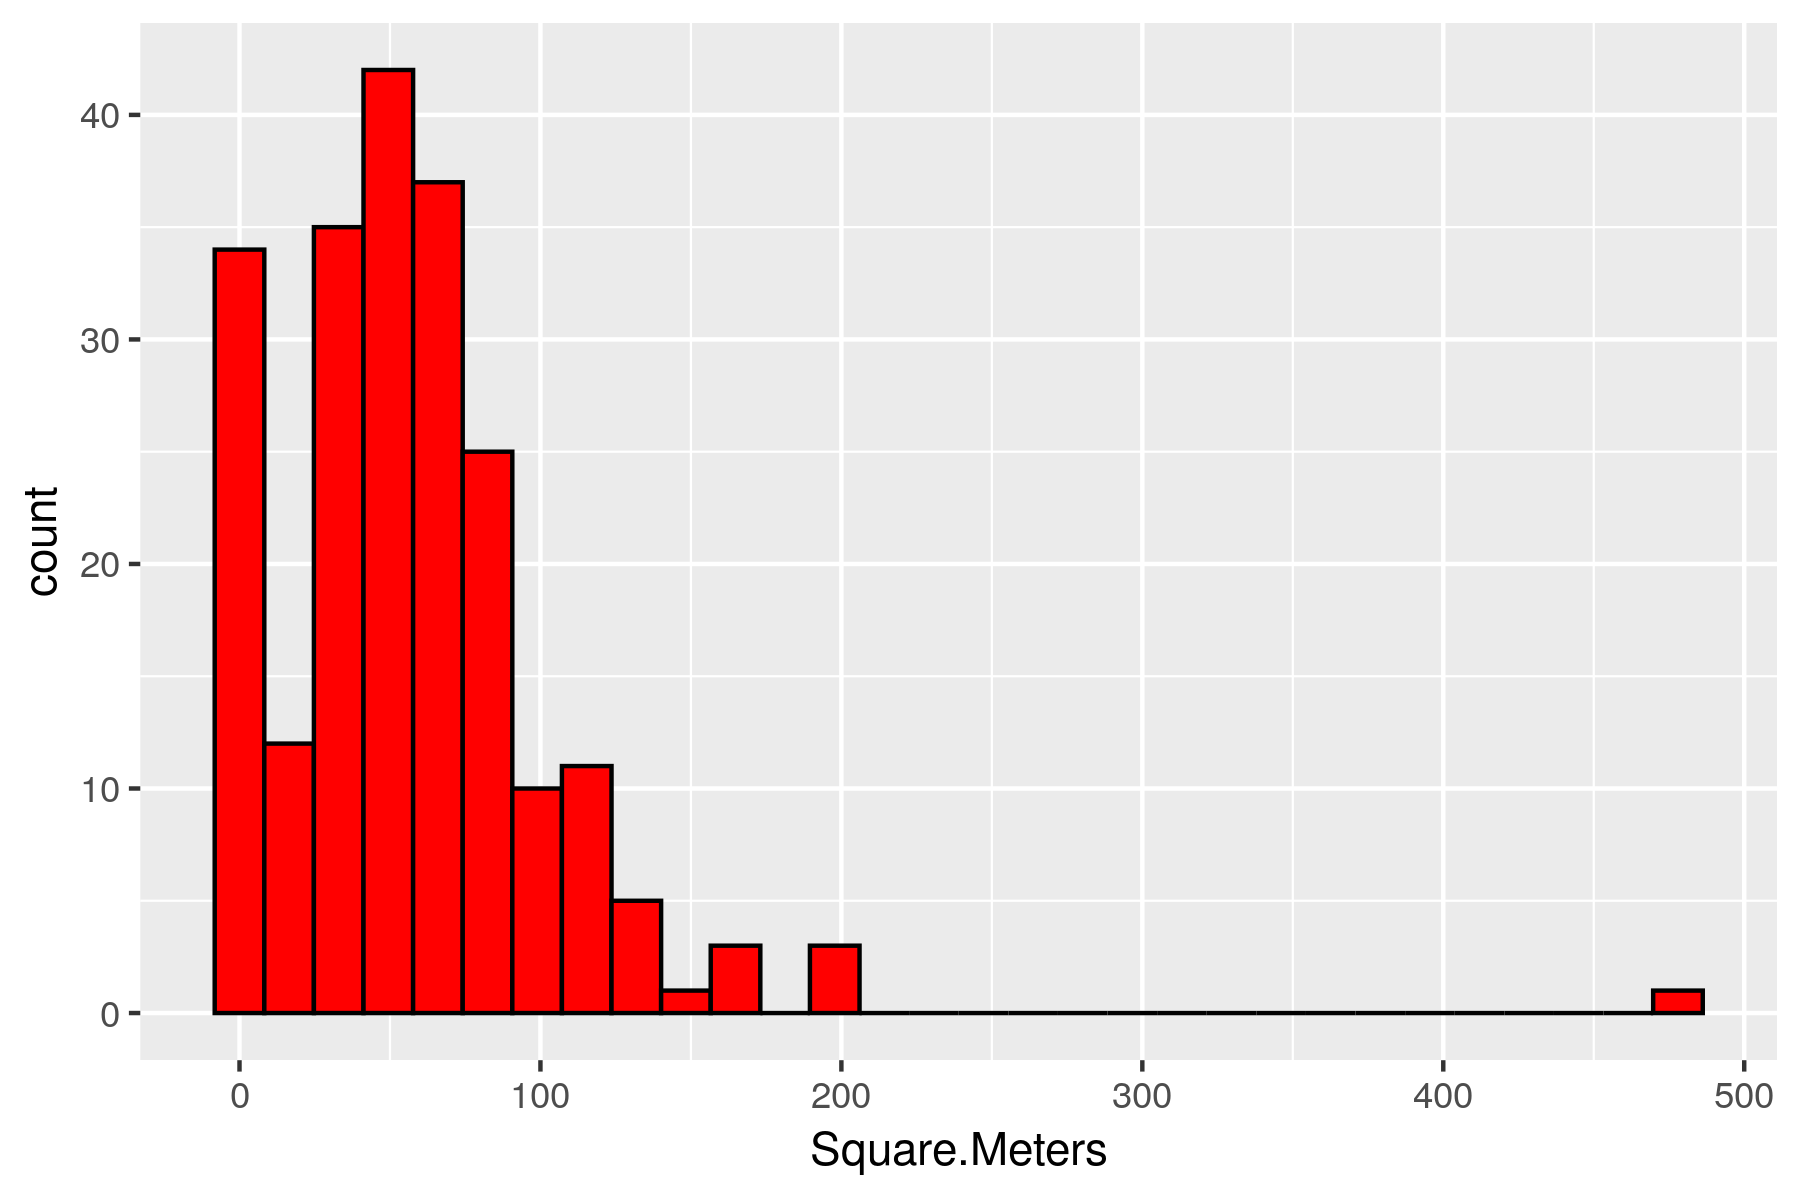

In [823]:
library(ggplot2)

p<-ggplot(df_madrid, aes(x=Square.Meters)) + 
  geom_histogram(color="black", fill="red")
p

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [824]:
df_madrid <- df_madrid %>% mutate(across(starts_with('Square.Meters'), ~replace(., . < 20, NA)))


Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [825]:
df_madrid |>  group_by(Neighbourhood) |> filter(!all(is.na(Square.Meters)))-> df_madrid

In [826]:
paste('quedarian',length(unique(df_madrid$Neighbourhood)),'Barrios')

[1] "quedarian 38 Barrios"

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

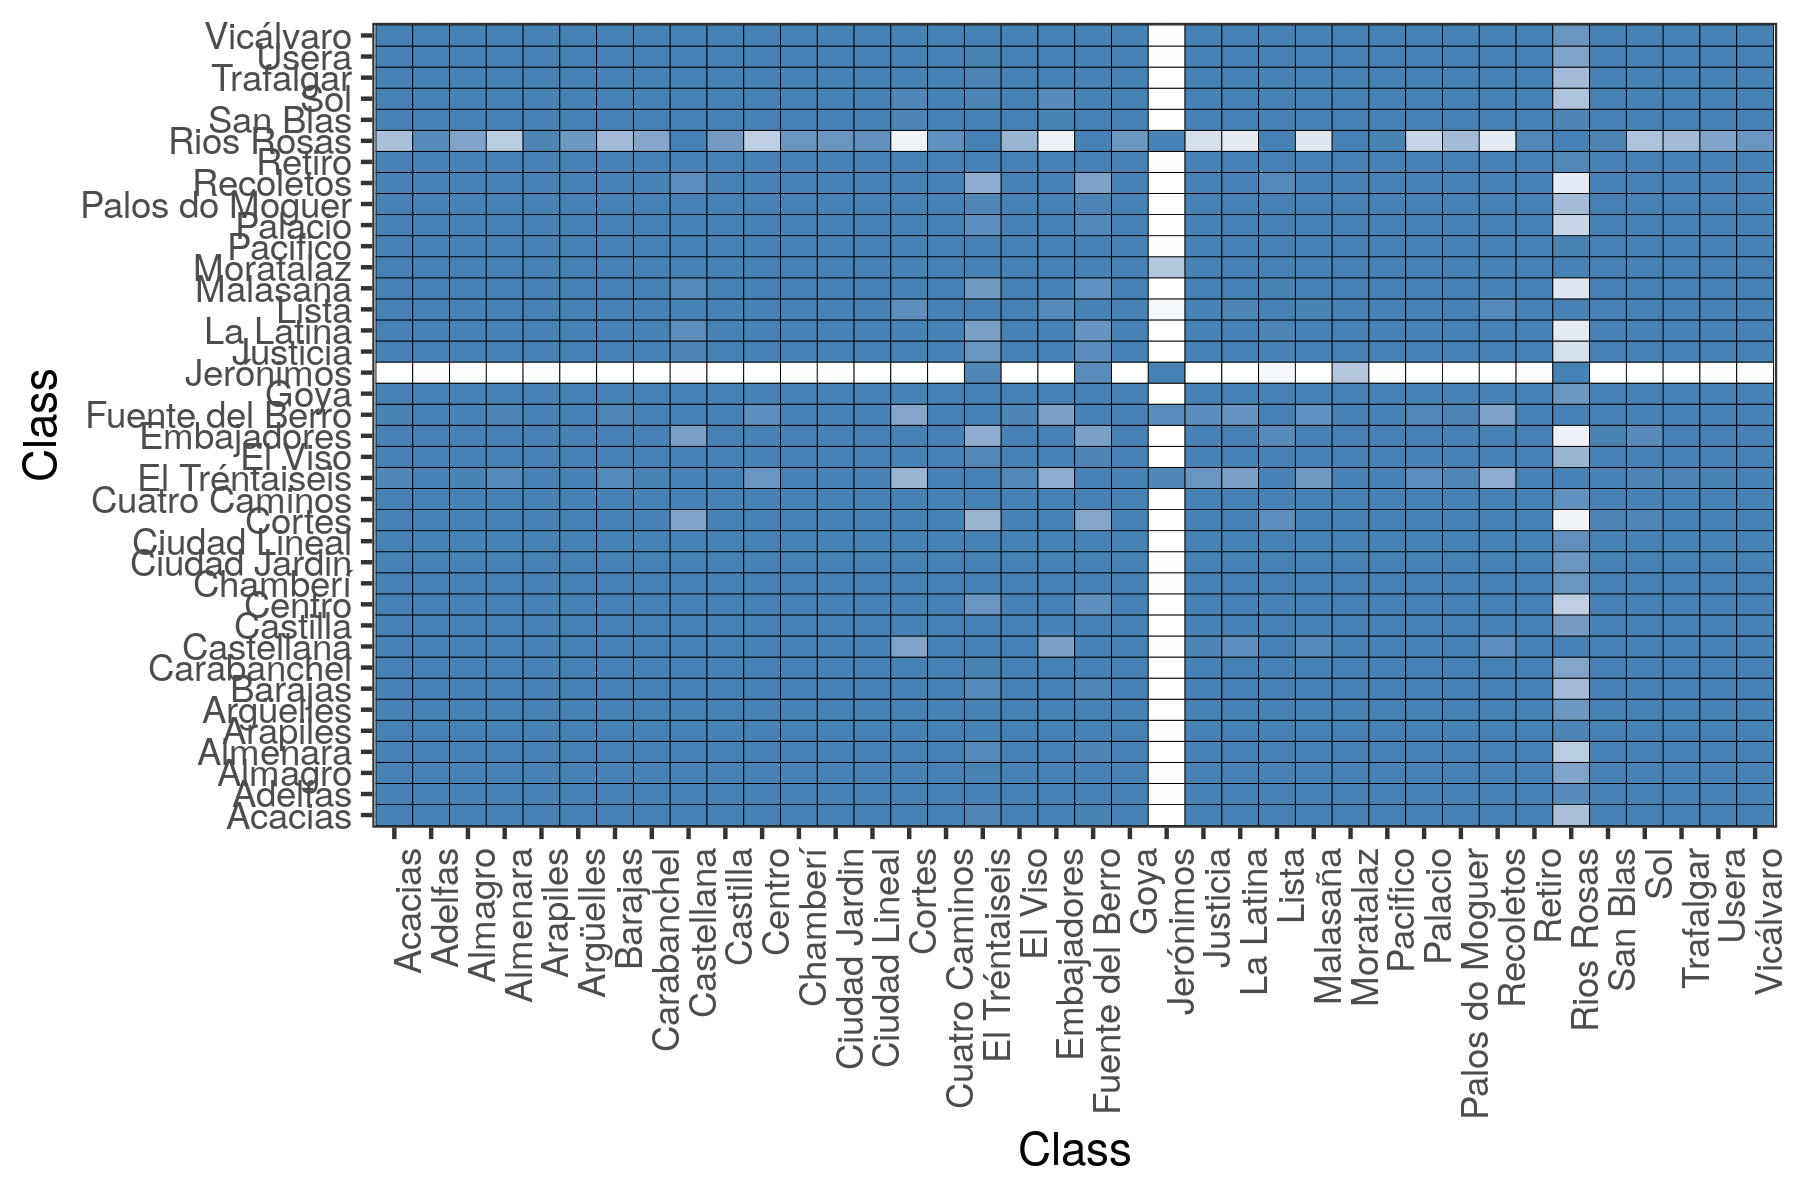

In [827]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


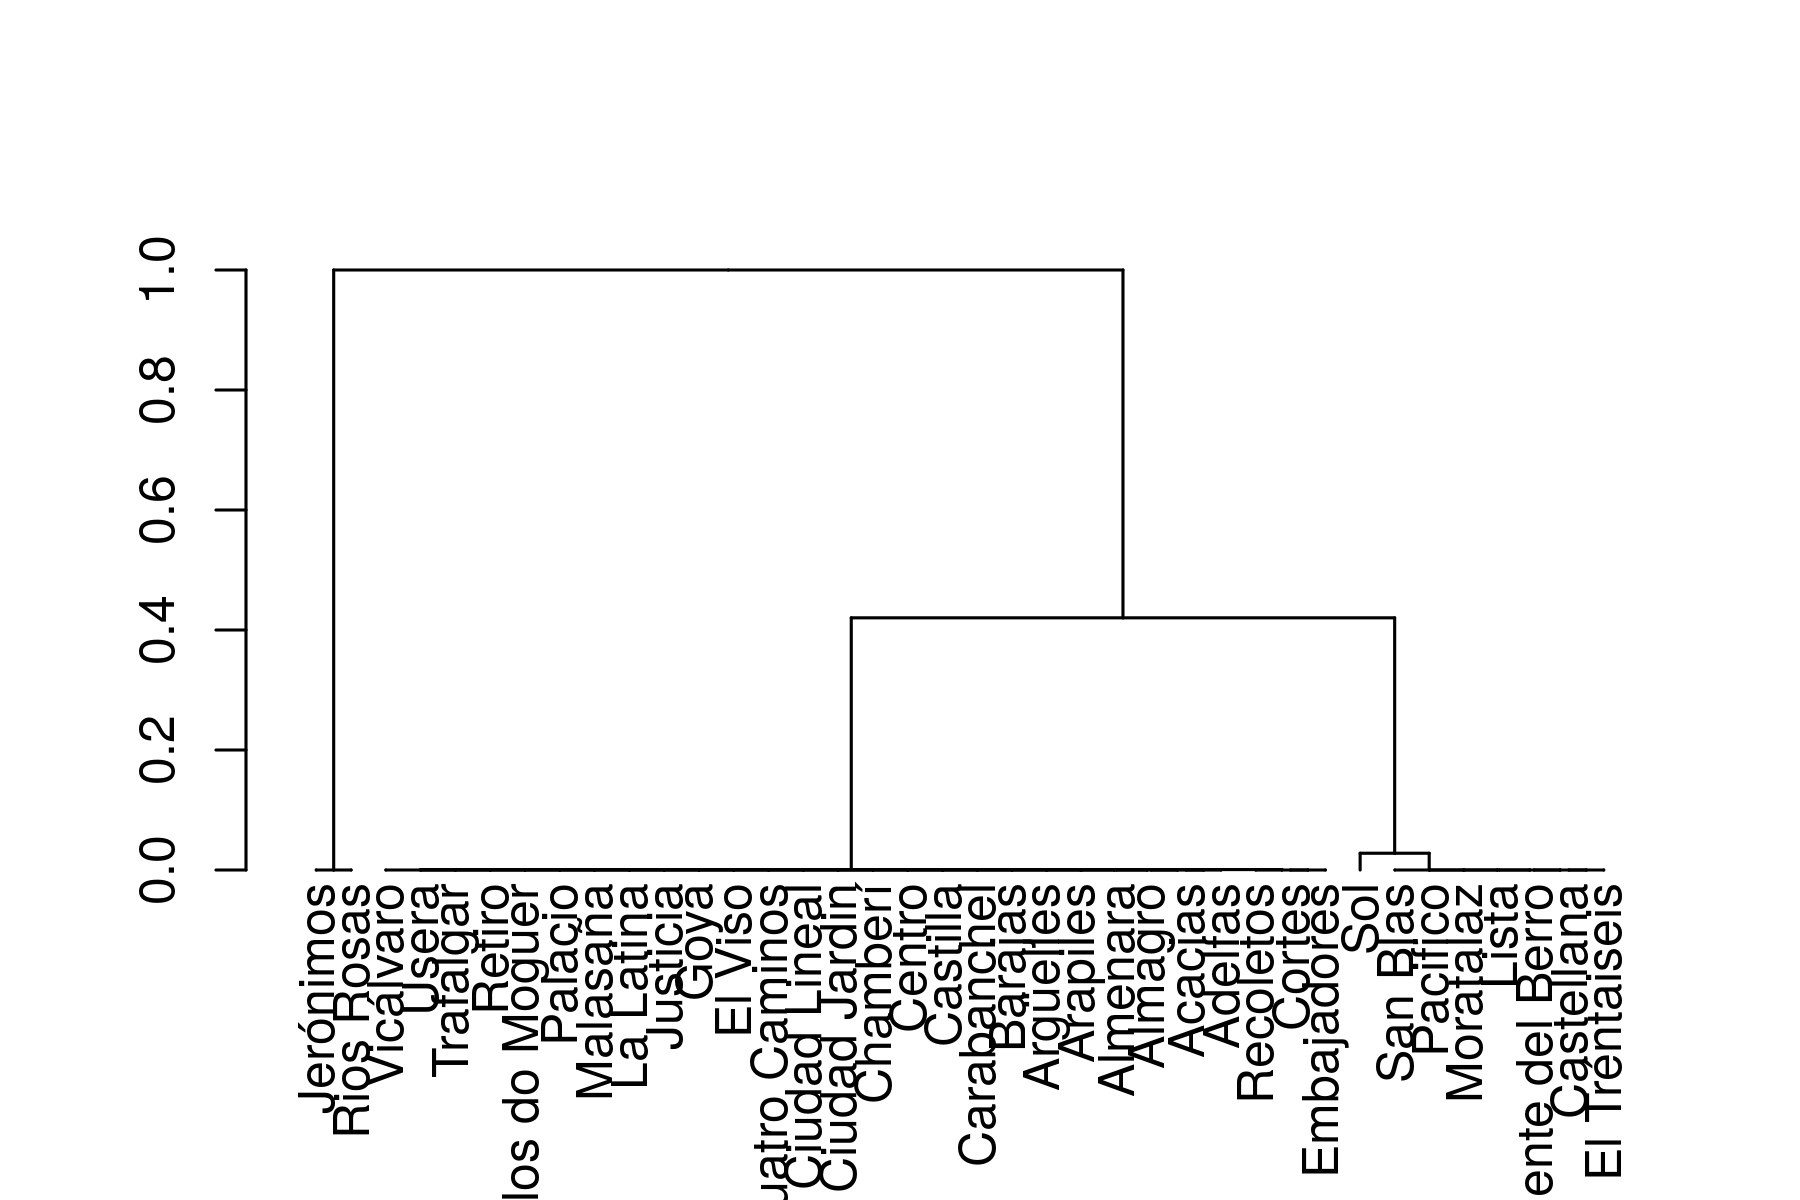

In [828]:
d <- as.dist(1-resm)
barrio <- hclust(d,method="complete")
barrio_d <- as.dendrogram(barrio)

plot(barrio_d)


In [829]:
library(dendextend)

Acacias          Adelfas          Almagro         Almenara 
               1                1                1                1 
        Arapiles        Argüelles          Barajas      Carabanchel 
               1                1                1                1 
      Castellana         Castilla           Centro         Chamberí 
               2                1                1                1 
   Ciudad Jardin    Ciudad Lineal           Cortes   Cuatro Caminos 
               1                1                1                1 
  El Tréntaiseis          El Viso      Embajadores Fuente del Berro 
               2                1                1                2 
            Goya        Jerónimos         Justicia        La Latina 
               1                3                1                1 
           Lista         Malasaña        Moratalaz         Pacifico 
               2                1                2                2 
         Palacio  Palos do Moguer        Recoletos           Retiro 
               1                1                1                1 
      Rios Rosas         San Blas              Sol        Trafalgar 
               3                2                2                1 
           Usera        Vicálvaro 
               1                1

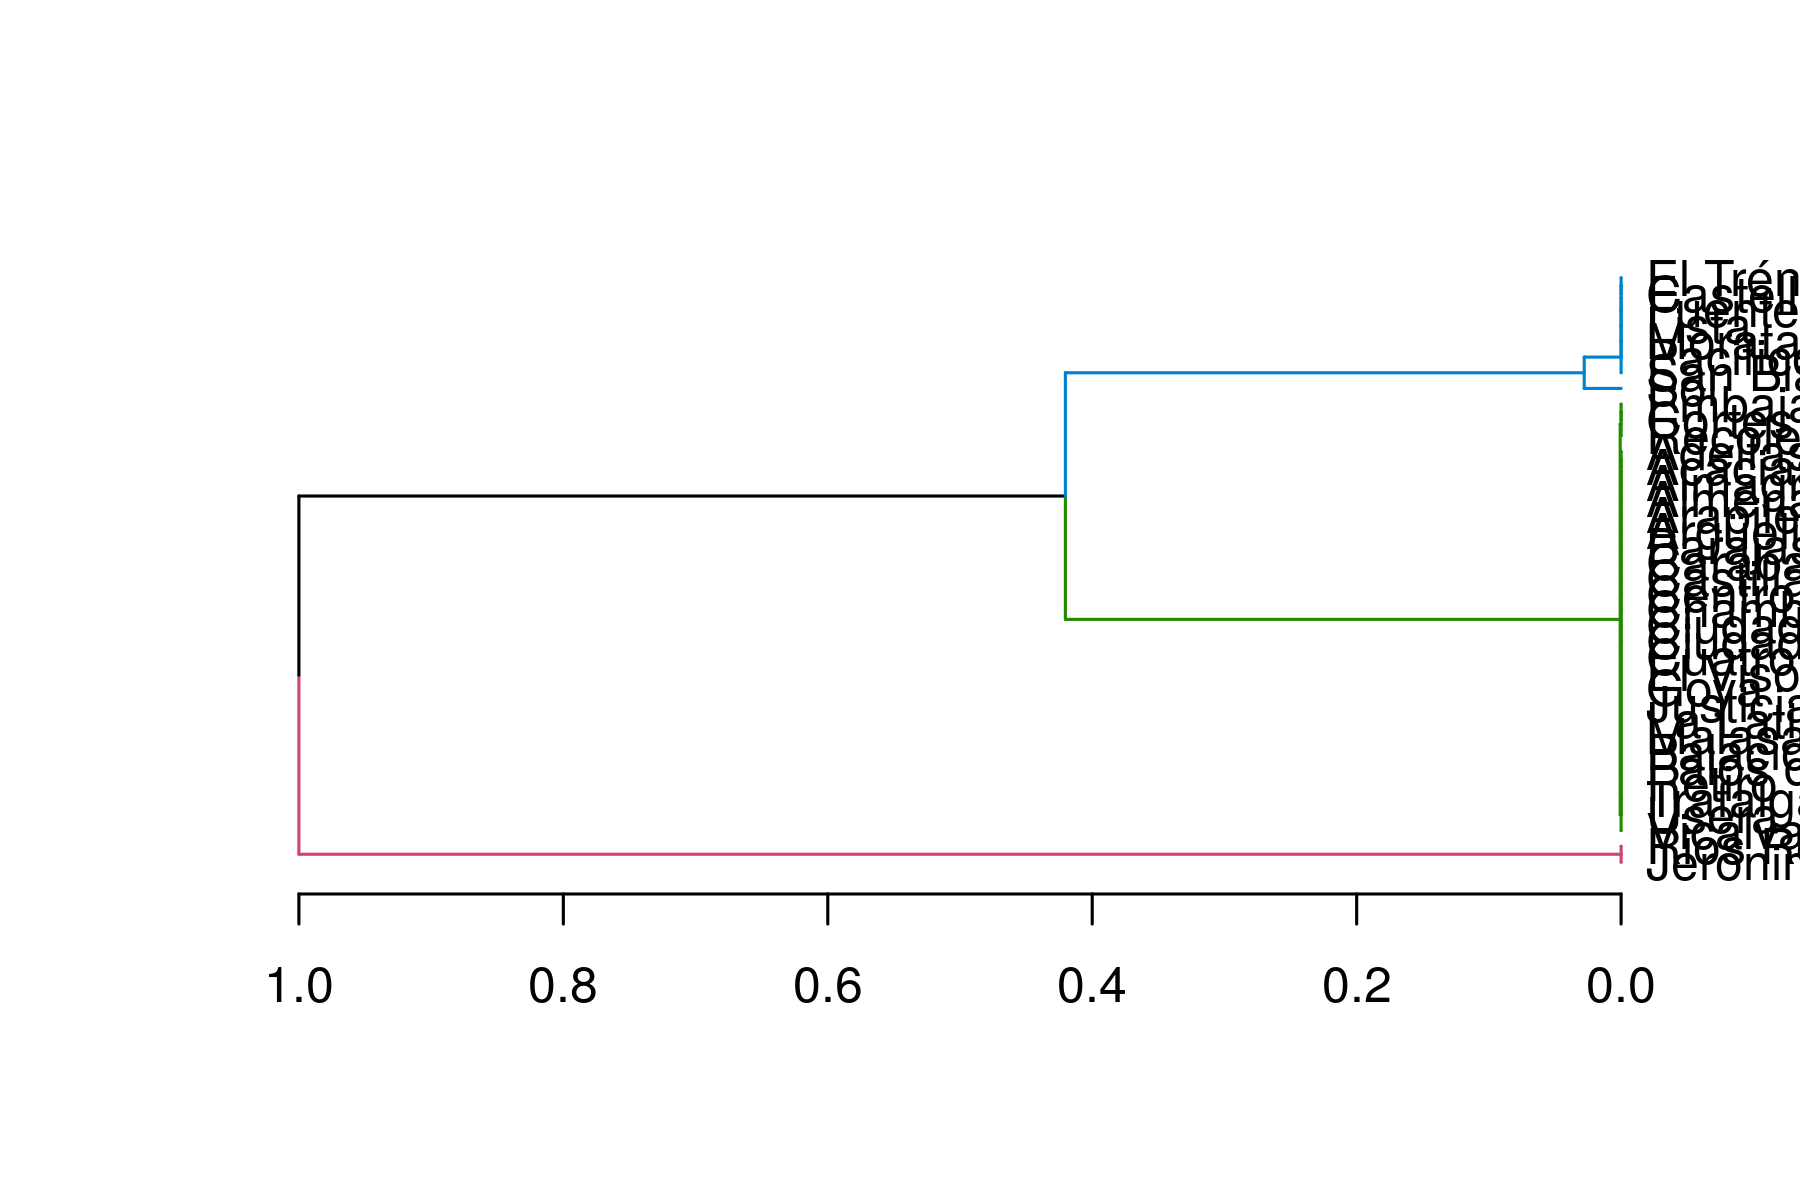

In [830]:
plot(color_branches(barrio_d,h=0.3),horiz=TRUE)
barrio_cut<- cutree(barrio,h=0.4)
barrio_cut


¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [831]:
paste('el corte aconsejable es la altura de 0.4 con un numero de 3 clusters')

[1] "el corte aconsejable es la altura de 0.4 con un numero de 3 clusters"

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [832]:
#creamos un df con barrios y su respectivo cluster creado anteriormente 

as.data.frame(barrio_cut)->cluster
colnames(cluster) <- "neighb_id" 
rownames(cluster)-> neighs
cluster$Neighbourhood<- neighs
#merge para unir los df y asi agregar neighb_id al principal
df_madrid <- merge(df_madrid,cluster,by='Neighbourhood')





In [833]:



summary(df_madrid)

 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:4901        Min.   : 1.000   Min.   :0.000   Min.   : 0.00  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.00  
 Mode  :character   Median : 4.000   Median :1.000   Median : 1.00  
                    Mean   : 4.091   Mean   :1.244   Mean   : 1.42  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.00  
                    Max.   :16.000   Max.   :6.000   Max.   :10.00  
                                     NA's   :14      NA's   :7      
      Beds            Price         Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 18.00   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 59.00   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 75.00   Median : 323.0   Median : 2.000  
 Mean   : 2.366   Mean   : 90.39   Mean   : 406.7   Mean   : 1.954  
 3rd Qu.: 3.000   3rd Qu.:100.00   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :800.00  

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [834]:
set.seed(564)
df_madrid_clean<- df_madrid[!is.na(df_madrid$Square.Meters),]
paste("tenemos:",nrow(df_madrid_clean),"filas con metros cuadrados ")

idx<-sample(1:nrow(df_madrid_clean),nrow(df_madrid_clean)*0.7)
bnb.train<-df_madrid_clean[idx,]
bnb.test <-df_madrid_clean[-idx,]
paste("train:",nrow(bnb.train))
paste("train:",nrow(bnb.test))
summary(bnb.train)

[1] "tenemos: 174 filas con metros cuadrados "

[1] "train: 121"

[1] "train: 53"

 Neighbourhood       Accommodates      Bathrooms        Bedrooms    
 Length:121         Min.   : 2.000   Min.   :1.000   Min.   :0.000  
 Class :character   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.:1.000  
 Mode  :character   Median : 4.000   Median :1.000   Median :1.000  
                    Mean   : 4.438   Mean   :1.306   Mean   :1.592  
                    3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.:2.000  
                    Max.   :16.000   Max.   :5.000   Max.   :5.000  
                                                     NA's   :1      
      Beds            Price         Square.Feet   Guests.Included
 Min.   : 1.000   Min.   : 20.00   Min.   : 237   Min.   :1.000  
 1st Qu.: 1.000   1st Qu.: 58.25   1st Qu.: 484   1st Qu.:1.000  
 Median : 2.000   Median : 76.00   Median : 646   Median :2.000  
 Mean   : 2.736   Mean   : 99.43   Mean   : 783   Mean   :2.174  
 3rd Qu.: 4.000   3rd Qu.:100.00   3rd Qu.: 915   3rd Qu.:2.000  
 Max.   :13.000   Max.   :500.00   Max.   :5167   Ma

In [835]:
#model<-lm(Square.Meters~Bedrooms +Bathrooms+Price+Beds+Guests.Included+as.factor(neighb_id)+
#          Review.Scores.Rating+ Extra.People , data=bnb.train)
model<-lm(Square.Meters~Accommodates+Bedrooms+Price+as.factor(neighb_id),data=bnb.train )
summary(model)


Call:
lm(formula = Square.Meters ~ Accommodates + Bedrooms + Price + 
    as.factor(neighb_id), data = bnb.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-126.742  -12.981   -2.254   11.990  126.742 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             6.17162    5.86292   1.053  0.29475    
Accommodates            5.14523    1.89039   2.722  0.00752 ** 
Bedrooms               19.18416    4.13585   4.639 9.50e-06 ***
Price                   0.08531    0.03938   2.166  0.03240 *  
as.factor(neighb_id)2   7.95134    6.01568   1.322  0.18891    
as.factor(neighb_id)3 137.73346   21.13872   6.516 2.09e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.34 on 113 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7203,	Adjusted R-squared:  0.7079 
F-statistic: 58.21 on 5 and 113 DF,  p-value: < 2.2e-16


In [836]:
bnb.test$Square.Predict<- predict(model,bnb.test)

bnb.train$Square.Predict<- predict(model,bnb.train)


In [837]:
#train
caret::postResample(bnb.train$Square.Predict,bnb.train$Square.Meters)
#test
caret::postResample(bnb.test$Square.Predict,bnb.test$Square.Meters)

RMSE Rsquared      MAE 
26.64451  0.72032 18.01012

RMSE   Rsquared        MAE 
22.7898771  0.7310591 15.8338108

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

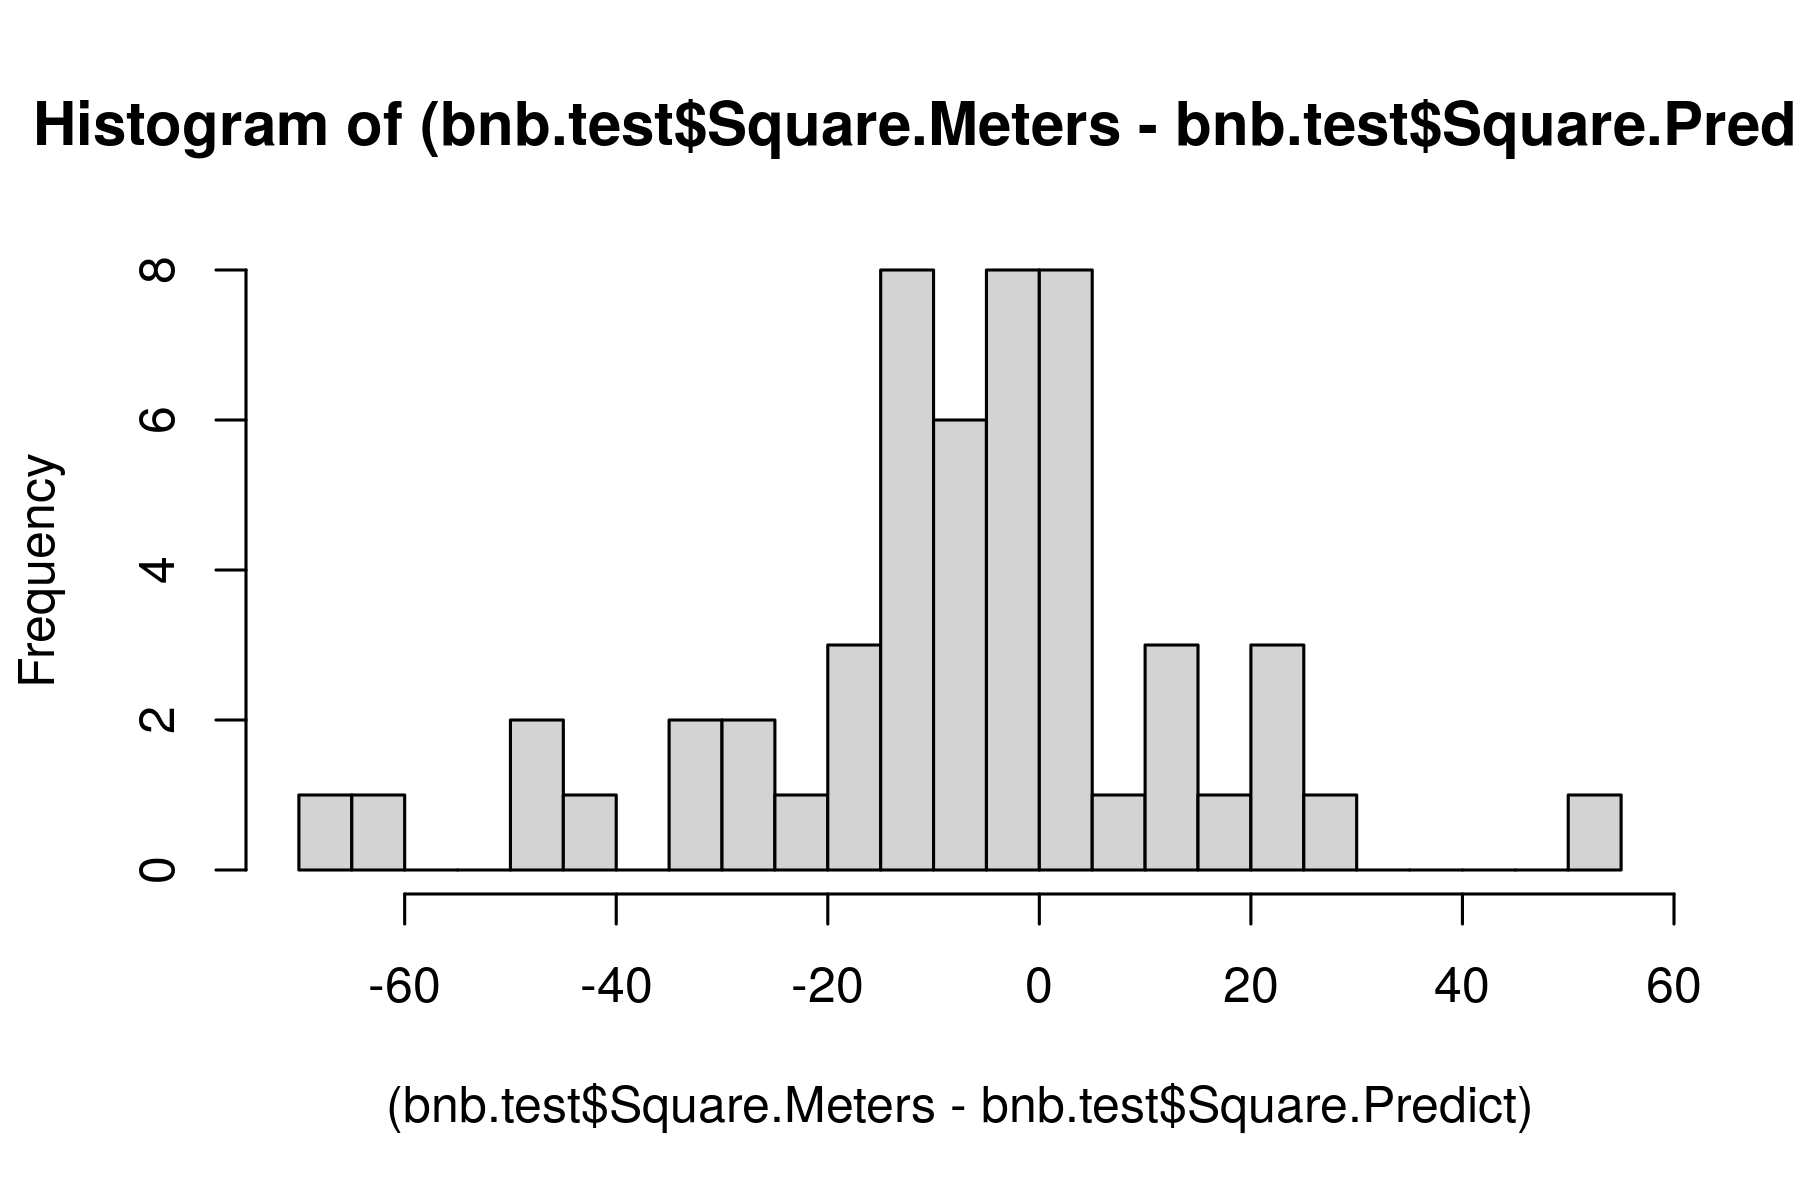

In [847]:
hist((bnb.test$Square.Meters-bnb.test$Square.Predict),20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [839]:

ejemplo1= data.frame(
  "Accommodates"=6,
    "Bedrooms" = 3,
  "neighb_id" = 2,
  "Price" = 80
  
)
ejemplo2= data.frame(
  "Accommodates"=6,
  "Bedrooms" = 4,
  "neighb_id" = 2,
  "Price" = 80
)

pro = predict(model, ejemplo1)
pro2=predict(model,ejemplo2)
pro
pro2
paste("Los metros cuadrados agregando una habitacion varian unos ",pro2-pro," metros")

1 
109.3716

1 
128.5557

[1] "Los metros cuadrados agregando una habitacion varian unos  19.1841638451648  metros"

In [840]:
bnbmadrid<-df_madrid[is.na(df_madrid$Square.Meters),]
prediction<- predict(model,df_madrid)

head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Acacias,4,2.0,2,2,65,NA,1,0,88,40.40125,-3.702125,NA,1
2,Acacias,2,0.5,0,2,30,NA,2,0,81,40.40351,-3.703586,NA,1
3,Acacias,6,1.0,2,3,60,NA,2,10,88,40.40554,-3.710429,NA,1
4,Acacias,4,1.0,2,3,60,NA,1,0,92,40.40604,-3.710295,NA,1
5,Acacias,6,1.0,2,3,50,NA,2,10,68,40.40226,-3.712753,NA,1
6,Acacias,2,1.0,1,1,75,NA,1,0,100,40.40460,-3.708392,NA,1


Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [841]:
predictions <- predict(model, newdata = df_madrid[is.na(df_madrid$Square.Meters),])

df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)] <- predictions


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [842]:
coldata <- c("Accommodates", "Bathrooms", "Bedrooms", "Beds", "Price", "Guests.Included",
              "Extra.People", "Review.Scores.Rating", "Latitude", "Longitude", "Square.Meters")
#quitamos los na y algunas columnas para poder realizar el pca
df_pca <- na.omit(df_madrid[,coldata])

str(df_pca)
#pr <- prcomp(df_pca, center = TRUE, scale. = TRUE)

'data.frame':	4187 obs. of  11 variables:
 $ Accommodates        : int  4 2 6 4 6 2 4 2 2 3 ...
 $ Bathrooms           : num  2 0.5 1 1 1 1 1 1 1 1 ...
 $ Bedrooms            : int  2 0 2 2 2 1 1 1 0 2 ...
 $ Beds                : int  2 2 3 3 3 1 3 1 1 2 ...
 $ Price               : int  65 30 60 60 50 75 68 50 39 55 ...
 $ Guests.Included     : int  1 2 2 1 2 1 2 1 1 1 ...
 $ Extra.People        : int  0 0 10 0 10 0 10 0 0 0 ...
 $ Review.Scores.Rating: int  88 81 88 92 68 100 90 69 100 92 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.7 -3.71 -3.71 -3.71 ...
 $ Square.Meters       : num  70.7 19 80.5 70.2 79.7 ...
 - attr(*, "na.action")= 'omit' Named int [1:714] 13 14 17 26 30 31 35 38 39 42 ...
  ..- attr(*, "names")= chr [1:714] "13" "14" "17" "26" ...


In [843]:
apart1<- data.frame(Accommodates=6, Bathrooms=2, Bedrooms=3, Beds=3,
                          Price=82, Guests.Included=6, Extra.People=20,
                          Review.Scores.Rating=70, Latitude=40.472, Longitude=-3.6931, Square.Meters=47.18617 )
#seleccionado del mismo df 
apart2<-df_pca[5,]


In [844]:
#funcion que busca el top 5 de mas similares segun apartamento, dentro de un dafaframe

busca_topcinco <- function(apartment, data) {
#preparacion de datos
  data_pca <- prcomp(data, center = TRUE, scale. = TRUE)
  df_new<-predict(data_pca,apartment)

  data_pca <- data_pca$x[,1:2]
  
  apartment <- df_new[,1:2]
  
  #calcular la distancia euclidea y ordenarla
  distances <- order(rowSums((apartment-data_pca)^2))
  
  # seleccionar el top 5 con la menores distancias
  top_five <- data[head(distances,5),]
  
  return (top_five)
}




In [845]:
busca_topcinco(apart1,df_pca)
apart1

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
141,5,1,3,5,50,5,20,93,40.47142,-3.696469,93.71571
603,4,1,3,4,90,4,25,91,40.45141,-3.658379,91.98284
558,7,1,3,4,80,6,9,93,40.42982,-3.642413,106.56544
477,6,2,2,4,85,4,10,100,40.47267,-3.675531,104.98039
4882,2,1,0,1,32,1,5,87,40.38471,-3.704336,19.19197


Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2,3,3,82,6,20,70,40.472,-3.6931,47.18617


In [846]:
busca_topcinco(apart2,df_pca)
apart2

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,6,1.0,2,3,50,2,10,68,40.40226,-3.712753,79.67678
3241,6,1.0,2,3,84,4,10,96,40.42202,-3.708037,82.57729
4419,6,1.5,2,3,89,2,20,96,40.41964,-3.706191,90.95517
4553,6,1.0,2,2,120,4,15,86,40.41901,-3.705467,93.59976
3915,4,1.0,2,3,62,3,15,94,40.41258,-3.715718,70.41003


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
5,6,1,2,3,50,2,10,68,40.40226,-3.712753,79.67678


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?